In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf

start = '2010-01-01'
end = '2023-04-30'

df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496295,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507526,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404014,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-24,165.000000,165.600006,163.889999,165.330002,165.101639,41949600
2023-04-25,165.190002,166.309998,163.729996,163.770004,163.543793,48714100
2023-04-26,163.059998,165.279999,162.800003,163.759995,163.533798,45498800
2023-04-27,165.190002,168.559998,165.190002,168.410004,168.177383,64902300
2023-04-28,168.490005,169.850006,167.880005,169.679993,169.445618,55209200


In [4]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496295,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507526,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404014,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800


In [5]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


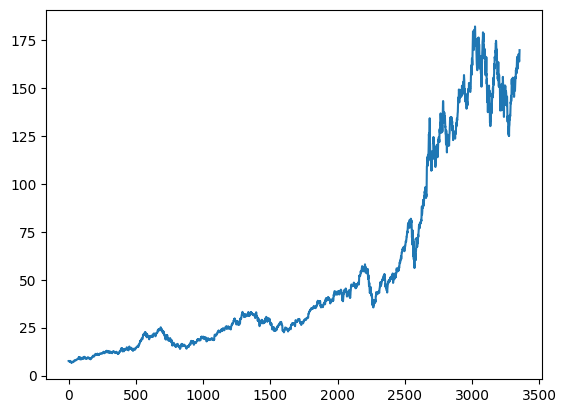

In [6]:
plt.plot(df['Close'])

### plotting 100 moving average and 200 moving average

In [7]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3348    148.0303
3349    148.2563
3350    148.4136
3351    148.6146
3352    148.8333
Name: Close, Length: 3353, dtype: float64

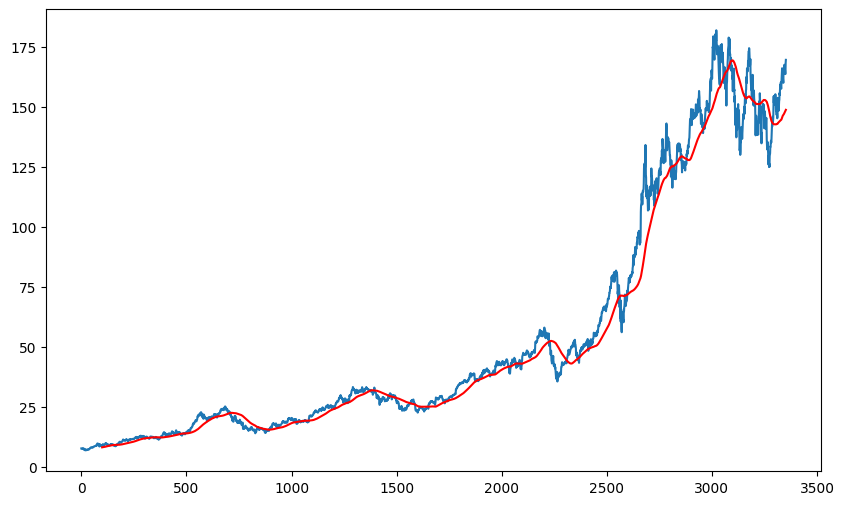

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.show()

In [9]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3348    150.48445
3349    150.56810
3350    150.66255
3351    150.77530
3352    150.89625
Name: Close, Length: 3353, dtype: float64

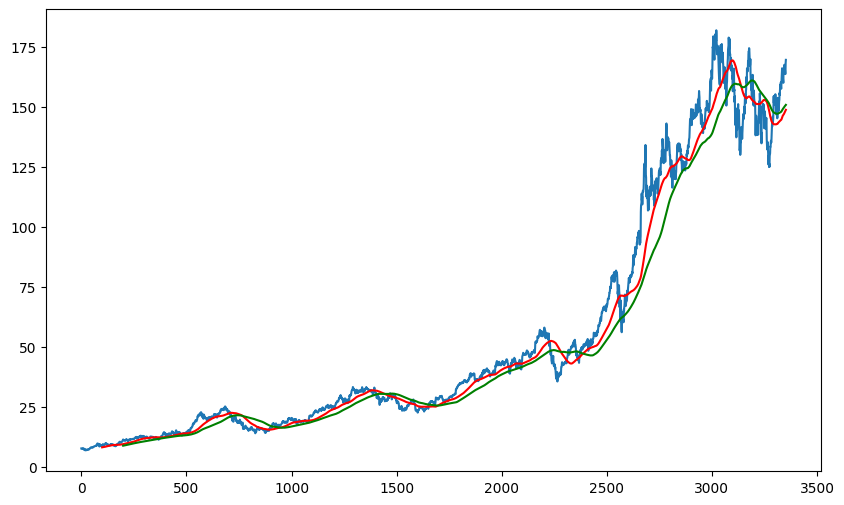

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')
plt.show()

In [11]:
df.shape

(3353, 5)

### splitting data into training and testing

In [12]:
data_train=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_train.shape)
print(data_test.shape)

(2347, 1)
(1006, 1)


In [13]:
data_train.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [14]:
data_test.head()

,Close
2347,52.287498
2348,52.937500
2349,52.119999
2350,50.715000
2351,50.724998


### Scale our data in between 0 and 1

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_array=scaler.fit_transform(data_train)

In [17]:
data_train_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.86580936],
       [0.84655549],
       [0.89469017]])

In [19]:
# here x_train is our currect data and y_train is our predicted data

In [20]:
data_train_array.shape

(2347, 1)

In [21]:
x_train=[]
y_train=[]

for i in range(100, data_train_array.shape[0]):
    x_train.append(data_train_array[i-100:i])
    y_train.append(data_train_array[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

### ML model

In [22]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [23]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
71/71 [==============================] - 22s 195ms/step - loss: 0.0333
Epoch 2/50
71/71 [==============================] - 13s 189ms/step - loss: 0.0068
Epoch 3/50
71/71 [==============================] - 14s 191ms/step - loss: 0.0063
Epoch 4/50
71/71 [==============================] - 14s 193ms/step - loss: 0.0051
Epoch 5/50
71/71 [==============================] - 14s 192ms/step - loss: 0.0049
Epoch 6/50
71/71 [==============================] - 14s 193ms/step - loss: 0.0054
Epoch 7/50
71/71 [==============================] - 14s 195ms/step - loss: 0.0045
Epoch 8/50
71/71 [==============================] - 14s 195ms/step - loss: 0.0038
Epoch 9/50
71/71 [==============================] - 14s 194ms/step - loss: 0.0045
Epoch 10/50
71/71 [==============================] - 14s 194ms/step - loss: 0.0037
Epoch 11/50
71/71 [==============================] - 14s 194ms/step - loss: 0.0039
Epoch 12/50
71/71 [==============================] - 14s 195ms/step - loss: 0.0033
Epoch 13/50
7

### dealing with testing data

In [26]:
data_test.head()

,Close
2347,52.287498
2348,52.937500
2349,52.119999
2350,50.715000
2351,50.724998


In [27]:
#i need previos 100 days data to predict the first data in testing data
past_100_days=data_train.tail(100)
past_100_days

,Close
2247,43.680000
2248,42.122501
2249,42.400002
2250,42.157501
2251,42.275002
...,...
2342,51.320000
2343,51.075001
2344,51.152500
2345,50.167500


In [28]:
final_df = pd.concat([past_100_days, data_test], ignore_index=True)
final_df.head()

,Close
0,43.680000
1,42.122501
2,42.400002
3,42.157501
4,42.275002


In [29]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.05552616],
       [0.04489204],
       [0.04678673],
       ...,
       [0.87539472],
       [0.90714353],
       [0.91581461]])

In [30]:
input_data.shape

(1106, 1)

In [31]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [32]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1006, 100, 1)
(1006,)


### making prediction

In [33]:
y_pred=model.predict(x_test)


32/32 [==============================] - 3s 73ms/step


In [34]:
y_pred.shape

(1006, 1)

In [35]:
y_pred

array([[0.15588674],
       [0.15699387],
       [0.1581145 ],
       ...,
       [0.86641324],
       [0.86666214],
       [0.86678576]], dtype=float32)

In [36]:
y_test

array([0.11429546, 0.11873346, 0.11315182, ..., 0.87539472, 0.90714353,
       0.91581461])

In [37]:
scaler.scale_

array([0.00682769])

In [38]:
scale_factor=1/0.00682769
y_pred=y_pred*scale_factor
y_test=y_test*scale_factor

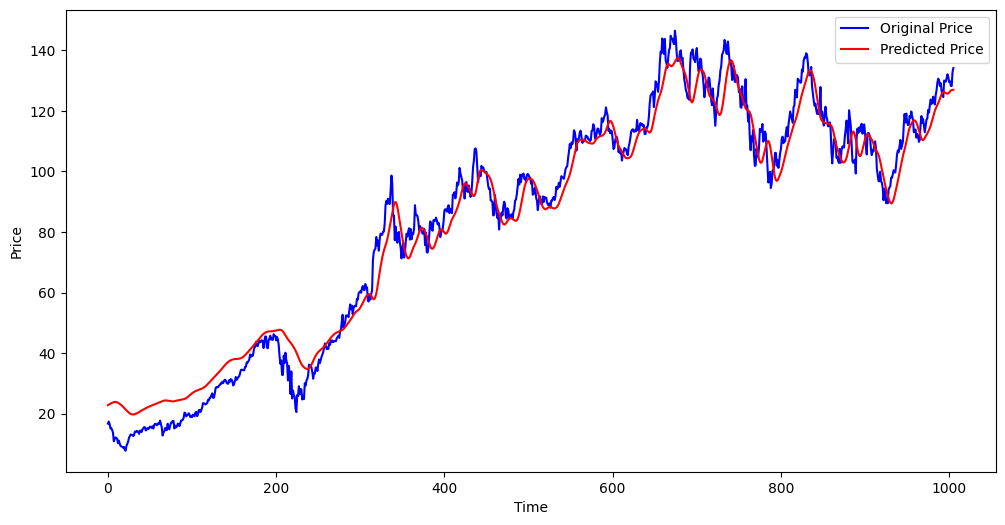

In [39]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_pred,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()